In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import unquote
from tqdm import tqdm 

dataFolder = '../Data/wikispeedia_paths-and-graph/'
articlesDf = pd.read_csv(dataFolder+ 'articles.tsv')
articlesDf = articlesDf.iloc[10:]
articlesSeries  = pd.Series(articlesDf.index.map(lambda x : x[0])).map(lambda y : unquote(y,'utf-8'))
#articlesSeries.head(10)

linksDf = pd.read_csv(dataFolder + 'links.tsv', header=11, sep = '\t')
linksDf.columns = ['Elements','links']
linksDf['Elements'] = linksDf['Elements'].map(lambda x : unquote(x, 'utf-8'))
linksDf['links'] = linksDf['links'].map(lambda x : unquote(x, 'utf-8'))
#linksDf.reset_index()

categoriesDf = pd.read_csv(dataFolder + 'categories.tsv', header=11, sep= '\t')
categoriesDf.index = categoriesDf.index.map(lambda x : unquote(x,'utf-8'))
categoriesDf.columns = ['categories']
#categoriesDf

paths_finishedDf= pd.read_csv(dataFolder + 'paths_finished.tsv', header=15, sep= '\t')
paths_finishedDf.columns = ['hashedIpAddress',   'timestamp',   'durationInSec',  'path',  'rating']
#paths_finishedDf

paths_unfinishedDf= pd.read_csv(dataFolder + 'paths_unfinished.tsv', header=16, sep= '\t')
paths_unfinishedDf.columns = ['hashedIpAddress',   'timestamp',   'durationInSec',  'path',  'target', 'type']
#paths_unfinishedDf

people_skin_color = pd.read_csv(dataFolder + 'people_with_skin_color.tsv', header=1, sep= '\t' )
people_skin_color.columns = ['Category', 'People', 'Skin Color']
people_skin_color['People'] = people_skin_color['People'].map(lambda x : unquote(x, 'utf-8'))
people_skin_color.reset_index()
#people_skin_color

,index,Category,People,Skin Color
0,0,subject.People.Historical_figures,Óengus I of the Picts,Blanc
1,1,subject.People.Historical_figures,Abbas I of Persia,Peau plus foncée
2,2,subject.People.Historical_figures,Adam Smith,Blanc
3,3,subject.People.Historical_figures,Adriaen van der Donck,Blanc
4,4,subject.People.Historical_figures,Agamemnon,Blanc
...,...,...,...,...
706,706,subject.People.Computing_People,Jimmy Wales,Blanc
707,707,subject.People.Computing_People,Linus Torvalds,Blanc
708,708,subject.People.Computing_People,Richard Stallman,Blanc
709,709,subject.People.Computing_People,Tim Berners-Lee,Blanc


1. Distribution of articles in each categories 


The dataset 'categories' contains main categories and then sub-categories. We will focus on main categories.

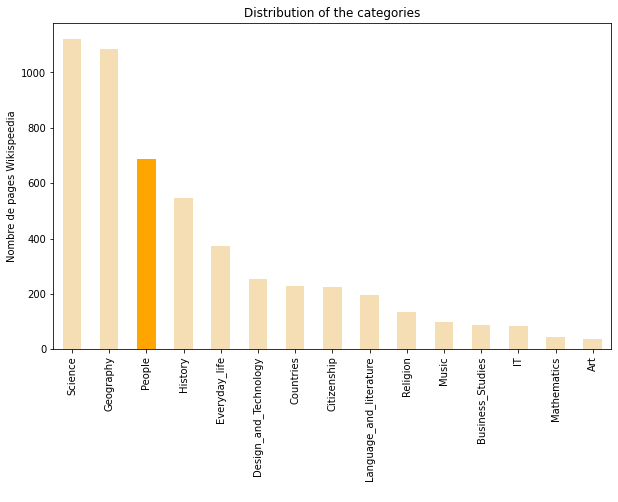

In [46]:
categories_details = categoriesDf["categories"].str.split(".", expand=True)

#keep only the main category
categories = categories_details[1]
categories = pd.DataFrame(categories)
categories = categories.rename(columns = {1 : 'Main Categories'})
categories_distribution=categories['Main Categories'].value_counts()

#Vizualise the distribution 
plt.figure(figsize=(10, 6))  
colors = ['wheat' if cat != 'People' else 'orange' for cat in categories_distribution.index]
categories_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of the categories')
plt.xlabel(' ')
plt.ylabel('Nombre de pages Wikispeedia')
plt.show()

People is the third category containing the bigger amount of articles (around 700 articles). We will know focus on this category and used our new dataset 'people_with_skin_color.tsv'

2. The ethnics distribution whitin people articles

To continue, we will focus on the ethnics distribution whithin the people articles. 

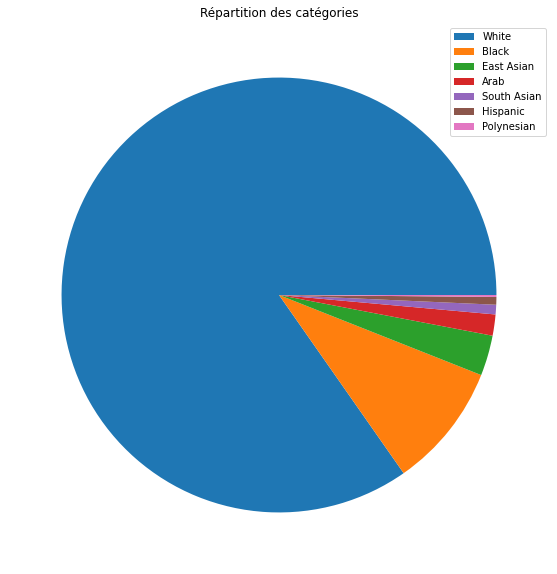

In [108]:
people_color =  pd.concat([people_skin_color, people_skin_color['Category'].str.split(".", expand=True)], axis=1)
people_color = people_color.drop(columns = ['Category', 0, 1])
people_color = people_color.rename(columns = {1 : 'Categories'})

unique_color=people_color['Skin Color'].unique()
rename = {
    'Blanc' : 'White',
    'Peau plus foncée' : 'Black',
    'Peau brune' : 'Black',
    'Peau plus foncée (Aborigène australien)' : 'Black',
    'Peau plus foncée (Asiatique)' : 'East Asian', 
    'Peau plus foncée (Moyen-Orient)' : 'Arab',
    'Peau plus foncée (Polynésien)' : 'Polynesian',
    'Peau plus foncée (Sherpa/Népalais)' : 'South Asian', 
    'Peau plus foncée (Ascendance africaine partielle)' : 'Black', 
    'Peau plus foncée (Indien)' : 'South Asian',
    'Peau plus foncée (Berbère)' : 'Arab',
    'Peau plus foncée (Arabe)' : 'Arab',
    'Peau plus foncée (Tibétain)' : 'East Asian',
    'Peau plus foncée (Persan)' : 'Arab',
    'Peau plus foncée (Juif)' : 'Arab', 
    'Peau plus foncée (Somalienne)' : 'Black', 
    'Peau plus foncée (Mixte)' : 'Black',
    'Peau plus foncée (Hispanique)' : 'Hispanic', 
    'Peau plus foncée (Indonésien)' : 'East Asian', 
    'Peau plus foncée (Japonais)' : 'East Asian',
    'Peau plus foncée (Vietnamien)' : 'East Asian', 
    'Peau plus foncée (Indienne)' : 'South Asian', 
    'Peau brune (Indien)' : 'South Asian',
    'Peau plus foncée (Palestinien)' : 'Arab',
    'Peau brune (Pakistano-Indien)' : 'South Asian', 
    "Blanc (D'origine libanaise)": 'White', 
    'Peau plus foncée (Brésilien)' : 'Hispanic'
}
people_color['Skin Color'] = people_color['Skin Color'].replace(rename)
people_color_dist=people_color['Skin Color'].value_counts()

#Vizualise the data
plt.figure(figsize=(10, 10))  
plt.pie(people_color_dist)
plt.title('Répartition des catégories')
plt.legend(people_color_dist.index)
plt.show()



So the distribution of white people is way more bigger than the representation of the other ethnics groups. Wikispeedia contains more article about white personalities. This already show the inequal representation of the different ethnics groups within the game.

3. To target ethnics groups (except white people), do the players have to pass by white people pages more than inversely ?

So, we will look closely to the pathways where the target articles is a white people.

In [76]:
#Create a dataframe with the path decompose (each cells represents one article of the paths)
path =  paths_finishedDf['path'].str.split(";", expand=True)

#creat a dataframe containing only the people name
people_name= people_color['People']

0    Óengus I of the Picts
1        Abbas I of Persia
2               Adam Smith
3    Adriaen van der Donck
4                Agamemnon
Name: People, dtype: object

In [ ]:
#Find the index of the pathway that used at least one article categories in People
liste_index=[]
for index, row in tqdm(path.iterrows()):
    for col in path.columns:
        cell_value = row[col]
        if cell_value in people_name.tolist():
            liste_index.append(index)

#Only keep unique index
liste_index[:] = list(set(liste_index))

#Only keep the line of the dataframe path_finished.tsv that contains People's article
people_path = path.loc[liste_index]

In [89]:
# Find all the final target containing a people in their path.
target=[]
for index, row in tqdm(people_path.iterrows()):
    no_none_value = [value for value in row if value != None]
    if no_none_value:
        final = no_none_value[-1]
        target.append(final)
    else:
        target.append(None)

2330it [00:00, 10086.08it/s]

['J._R._R._Tolkien', 'J._R._R._Tolkien', 'Painting', 'Trinity', 'Jupiter_%28mythology%29', 'Hirohito', 'Rainbow', '8th_century', 'Asparagus', 'Jesus', 'Zebra', 'Zebra', 'Zebra', 'Shaka', 'Ethics', 'Zebra', 'Anglicanism', 'Sirius', 'Raphael', 'Zebra', 'Screw', 'Zebra', 'Politics', 'Aristotle', 'Jesus', 'Jesus', 'Charlemagne', 'Manufacturing', 'Confucius', 'Confucius', 'Tenzing_Norgay', 'Medicine', 'Star_Wars_Episode_IV__A_New_Hope', 'Jesus', 'Holy_Roman_Empire', 'Tellurium', 'Mario', 'Cyclops', 'Confucius', 'Novel', 'Algebra', 'Niobium', 'Muhammad', 'Muhammad', 'Muhammad', 'Muhammad', 'Aristotle', 'Monarchy', 'Sistine_Chapel_ceiling', 'Sistine_Chapel_ceiling', 'Jerusalem', 'Last_Supper', 'Romulus_Augustus', 'Ocean', 'Rococo', 'Heracles', 'Heracles', 'Euclidean_geometry', 'Alexander_the_Great', 'Ancient_Greece', 'Stephen_Hawking', 'Stephen_Hawking', 'Egyptian_pyramids', 'Stephen_Hawking', 'Egyptian_pyramids', 'Fern', 'Chives', 'Chives', 'Columbia_River', 'Columbia_River', 'Thrasybulus', 

In [107]:
#Only keep the target which are People
people_target = [people for people in target if people in people_name.tolist()]

#Count how many times each people are target
people_target_count = pd.Series(people_target).value_counts().reset_index()
people_target_count.columns =['People', 'Count']

#Merge with the original color_people dataframe to have the informations on the ethnicity and category
people_target_df = people_target_count.merge(people_color)
people_target_df

,People,Count,Skin Color,2
0,Jesus,197,Arab,Religious_figures_and_leaders
1,Socrates,46,White,Philosophers
2,Muhammad,43,Arab,Religious_figures_and_leaders
3,Buddha,33,East Asian,Religious_figures_and_leaders
4,Aristotle,31,White,Philosophers
5,Confucius,28,East Asian,Philosophers
6,Hippocrates,25,White,Human_Scientists
7,Plato,22,White,Philosophers
8,Pythagoras,20,White,Mathematicians
9,Agamemnon,19,White,Historical_figures


No handles with labels found to put in legend.


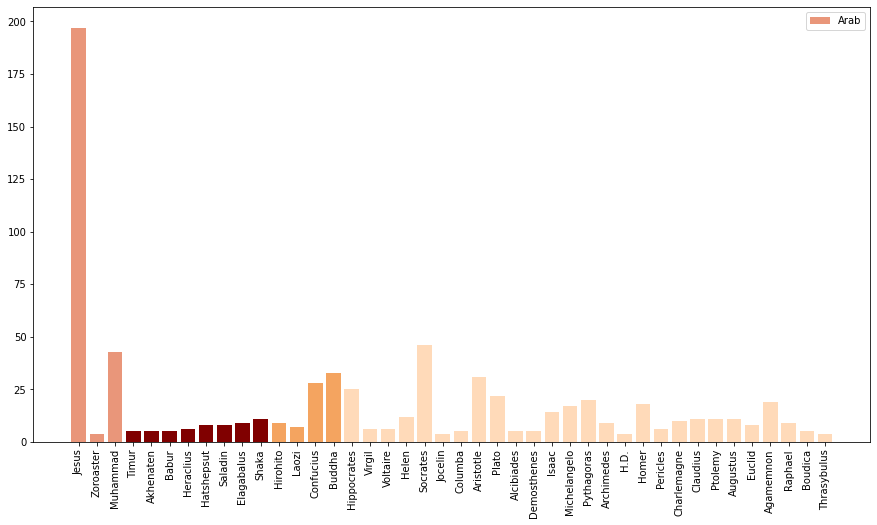

In [132]:
#Vizualise the data 
people_target_df = people_target_df.sort_values(by = 'Skin Color')
couleur = ['darksalmon' if ethnic == 'Arab' else 'maroon' if  ethnic == 'Black' else 'sandybrown' if ethnic == 'East Asian' 
           else 'peachpuff' for ethnic in people_target_df['Skin Color']]

plt.figure(figsize=(15, 8)) 
plt.bar(people_target_df['People'], people_target_df['Count'], color = couleur)
plt.xticks(rotation='vertical')
plt.legend()

#AFFICHER LA LEGENDE 

So we clearly see, that white people dominate the target of the game with in second positions black people and then east asian an arab people. Some ethnics groups are not even represented in the target such as south east people. One person is highly target it is Jesus. 